### Simple CNN Model for cats vs dogs classification 

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [4]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

In [6]:
#generating batches of images from the directories and converting to integers
train_dir = r'C:\Users\v-nitbal\Documents\DL with Python - Francois Chollet\CNN for computer vision\cats_and_dogs_small\train'
val_dir = r'C:\Users\v-nitbal\Documents\DL with Python - Francois Chollet\CNN for computer vision\cats_and_dogs_small\validation'
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')
val_generator = test_datagen.flow_from_directory(val_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=val_generator, 
                              validation_steps=50)

W1021 10:28:56.298695 19948 deprecation_wrapper.py:119] From C:\Users\v-nitbal\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/30
100/100 [==============================] - 286s 3s/step - loss: 0.6943 - acc: 0.5375 - val_loss: 0.6766 - val_acc: 0.5860
Epoch 2/30
100/100 [==============================] - 288s 3s/step - loss: 0.6777 - acc: 0.5725 - val_loss: 0.6603 - val_acc: 0.5840
Epoch 3/30
100/100 [==============================] - 291s 3s/step - loss: 0.6393 - acc: 0.6285 - val_loss: 0.6552 - val_acc: 0.5980
Epoch 4/30
100/100 [==============================] - 300s 3s/step - loss: 0.6180 - acc: 0.6540 - val_loss: 0.6874 - val_acc: 0.6120
Epoch 5/30
100/100 [==============================] - 288s 3s/step - loss: 0.5927 - acc: 0.6680 - val_loss: 0.6375 - val_acc: 0.6500
Epoch 6/30
100/100 [==============================] - 298s 3s/step - loss: 0.5712 - acc: 0.7080 - val_loss: 0.6962 - val_acc: 0.6240
Epoch 7/30
100/100 [==============================] - 295s 3s/step - loss: 0.5317 - acc: 0.7380 - val_loss: 0.5943 - val_acc: 0.6690
Epoch 8/30
100/100 [==============================] - 298s 3s/step - 

In [8]:
model.save('cats_and_dogs_simple.h5')

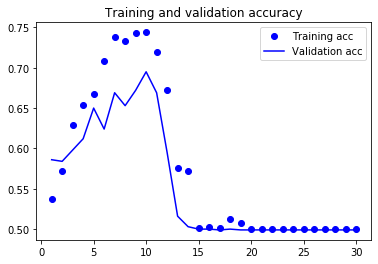

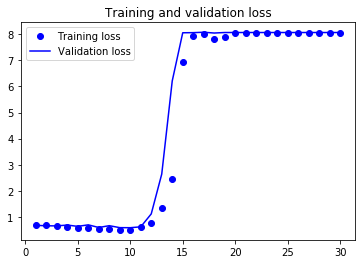

In [10]:
#visualize accuracy and loss during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()